## Import packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import operator as op
from sklearn.linear_model import LinearRegression

## Create some random numbers.

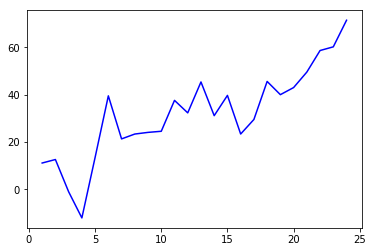

In [2]:
X = np.array(range(1, 25))
Y = np.array([ele*np.exp(1)-10*np.random.randn() for ele in X])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
plt.plot(X, Y, 'b')
plt.show()

## Plot predicted line(with params initialized as 0).

M=25 , c=81


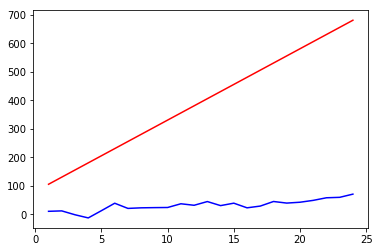

In [3]:
m = np.random.randint(1,100)
c = np.random.randint(1,100)
print 'M={} , c={}'.format(m, c)
Y_pred = X*m + c
plt.plot(X, Y,'b')
plt.plot(X, Y_pred, 'r')
plt.show()

## Define RSS and gradient functions. 

In [4]:
def RSS(Y, Y_pred):
    diff = Y - Y_pred
    rss = np.sqrt(diff * diff)
    return sum(rss)

In [5]:
def grad(x, y):
    return -2*x*(y-(m*x+c))

## Initialize rate and no. of iterations.

In [6]:
eta = 0.0001
iters = 10000
old_rss = RSS(Y, Y_pred)

## Plot before SGD.

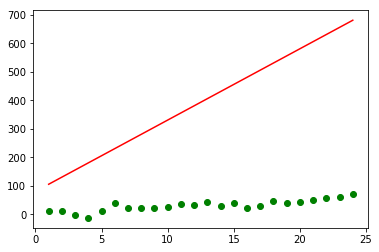

In [7]:
plt.scatter(X, Y, c='g')
plt.plot(X, Y_pred, 'r')
plt.show()

## Perform SGD to reduce RSS within specified no. of iterations.

In [8]:
while RSS(Y, Y_pred)>5:
    iters -= 1
    if iters == 0:
        print 'Ran out of iters'
        break
    #print RSS(Y,Y_pred)
    for idx,ele in enumerate(X):
        m = m-(eta)*grad(ele, Y[idx])
        c = c-(eta)*grad(ele, Y[idx])
        Y_pred = m*X + c

Ran out of iters


## Plot after SGD.

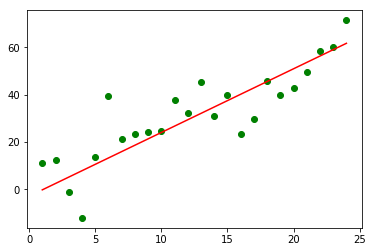

Reduced RSS from:[ 8679.4577057] to:[ 186.50290457]


In [9]:
new_rss = RSS(Y, Y_pred)
plt.scatter(X, Y, c='g')
plt.plot(X, Y_pred, 'r')
plt.show()
print("Reduced RSS from:{} to:{}".format(old_rss, new_rss))

## Comparing our approach to that of SKLearn.

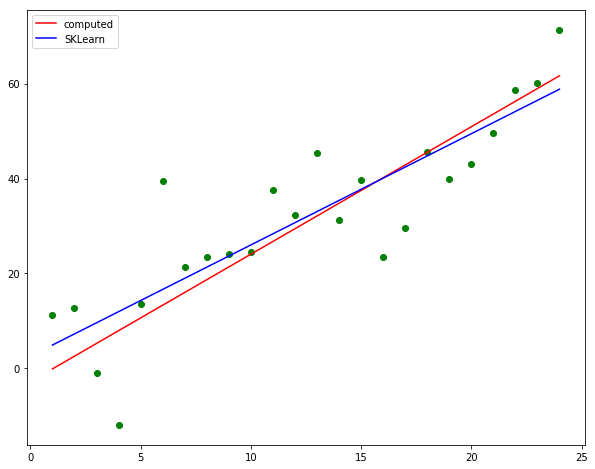

In [10]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X, Y)
Y_pred_skl = lr.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c='g')
plt.plot(X, Y_pred, c='r', label='computed')
plt.plot(X, Y_pred_skl, 'b', label='SKLearn')
plt.legend()
plt.show()